<a href="https://colab.research.google.com/github/GalaAldebara/PCVK_IqbalMakmur/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Muhammad Iqbal Makmur Al-Muniri
## Kelas : TI-3H
## NIM : 2241720099
## No : 16

## Tugas Praktikum Filter
### 1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa menggunakan library atau metode konvolusi dari OpenCV.  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


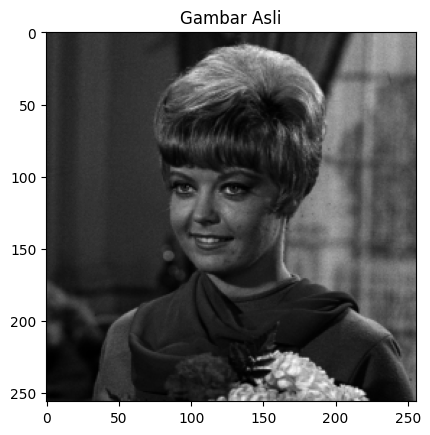

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Baca gambar dari Google Drive
image_path = '/content/drive/MyDrive/Images/female.tiff'
image = Image.open(image_path).convert('L')  # Konversi ke grayscale
image_array = np.array(image)

# Tampilkan gambar asli
plt.imshow(image_array, cmap='gray')
plt.title("Gambar Asli")
plt.show()


In [ ]:
def convolution(image, kernel):
    img_height = len(image)
    img_width = len(image[0])
    kernel_height = len(kernel)
    kernel_width = len(kernel[0])

    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    result = [[0] * img_width for _ in range(img_height)]

    for i in range(pad_height, img_height - pad_height):
        for j in range(pad_width, img_width - pad_width):
            value = 0
            for ki in range(kernel_height):
                for kj in range(kernel_width):
                    ni = i + ki - pad_height
                    nj = j + kj - pad_width
                    value += image[ni][nj] * kernel[ki][kj]
            result[i][j] = value

    return result


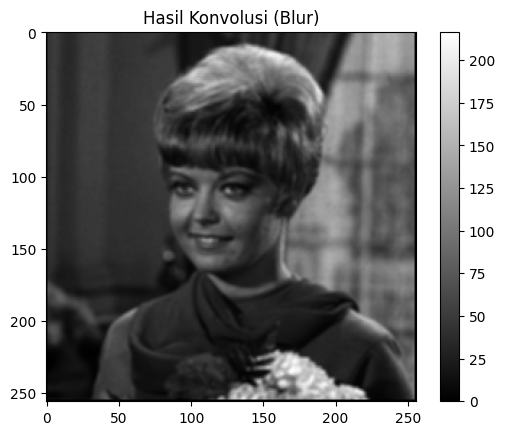

In [ ]:
# Contoh kernel blur
kernel = [
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
]

# Terapkan konvolusi
result = convolution(image_array, kernel)
result_array = np.array(result)

# Tampilkan gambar hasil konvolusi
plt.imshow(result_array, cmap='gray')
plt.title("Hasil Konvolusi (Blur)")
plt.colorbar()
plt.show()


### 2. Berikut merupakan langkah-langkah yang dapat dilakukan:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [ ]:
def convolution(image, kernel, padding=0):
    img_height = len(image)
    img_width = len(image[0])
    kernel_height = len(kernel)
    kernel_width = len(kernel[0])

    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Inisialisasi hasil dengan ukuran yang sama
    result = [[0] * img_width for _ in range(img_height)]

    # Menambahkan padding pada gambar asli
    padded_image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    # Melakukan konvolusi
    for i in range(pad_height, img_height - pad_height):
        for j in range(pad_width, img_width - pad_width):
            value = 0
            for ki in range(kernel_height):
                for kj in range(kernel_width):
                    ni = i + ki - pad_height
                    nj = j + kj - pad_width
                    value += padded_image[ni][nj] * kernel[ki][kj]
            result[i][j] = value

    return result


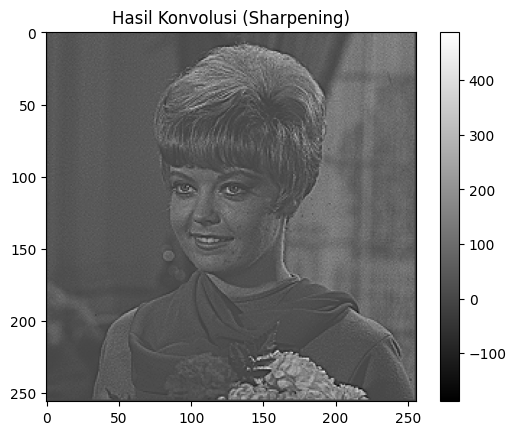

In [ ]:
# Kernel sharpening
sharpening_kernel = [
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
]

# Terapkan konvolusi dengan kernel sharpening
sharpened_result = convolution(image_array, sharpening_kernel)
sharpened_array = np.array(sharpened_result)

# Tampilkan hasilnya
plt.imshow(sharpened_array, cmap='gray')
plt.title("Hasil Konvolusi (Sharpening)")
plt.colorbar()
plt.show()


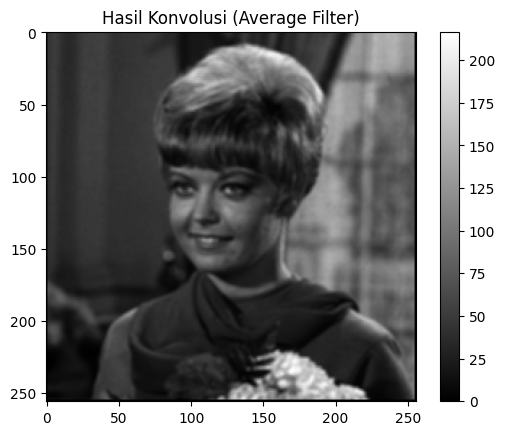

In [ ]:
# Kernel lainnya sebagai contoh
average_kernel = [
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
]

# Terapkan konvolusi dengan kernel rata-rata
average_result = convolution(image_array, average_kernel)
average_array = np.array(average_result)

# Tampilkan hasil dengan kernel rata-rata
plt.imshow(average_array, cmap='gray')
plt.title("Hasil Konvolusi (Average Filter)")
plt.colorbar()
plt.show()


### 3. Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter berikut

### Sharpen

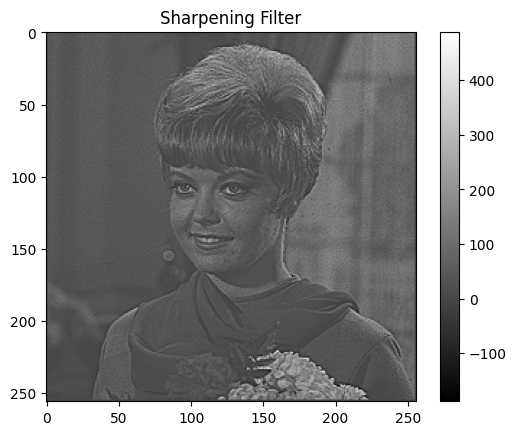

In [ ]:
# Sharpening Filter 3x3
sharpening_kernel = [
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
]

# Terapkan Sharpening Filter
sharpening_result = convolution(image_array, sharpening_kernel)
plt.imshow(np.array(sharpening_result), cmap='gray')
plt.title("Sharpening Filter")
plt.colorbar()
plt.show()


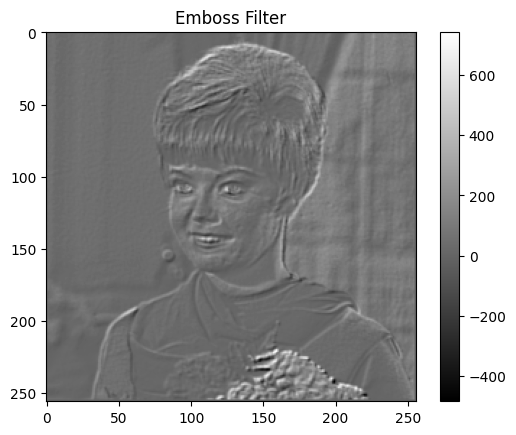

In [ ]:
# Emboss Filter 3x3
emboss_kernel = [
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]
]

# Terapkan Emboss Filter
emboss_result = convolution(image_array, emboss_kernel)
plt.imshow(np.array(emboss_result), cmap='gray')
plt.title("Emboss Filter")
plt.colorbar()
plt.show()


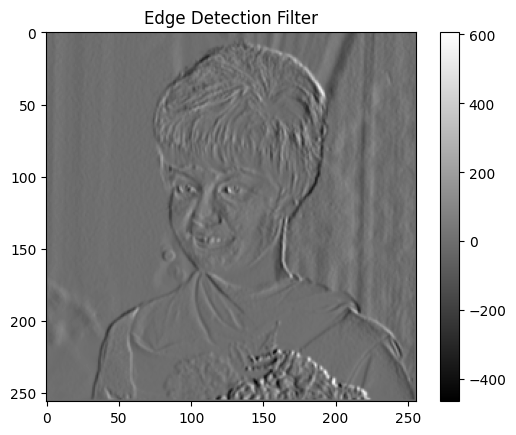

In [ ]:
# Sobel Edge Detection Filter (Left)
sobel_kernel = [
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
]

# Terapkan Edge Detection Filter
sobel_result = convolution(image_array, sobel_kernel)
plt.imshow(np.array(sobel_result), cmap='gray')
plt.title("Edge Detection Filter")
plt.colorbar()
plt.show()


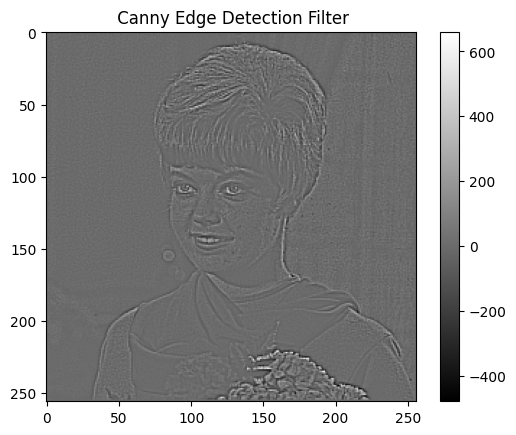

In [ ]:
# Canny Edge Detection
canny_kernel = [
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
]

# Terapkan Edge Detection Filter
canny_result = convolution(image_array, canny_kernel)
plt.imshow(np.array(canny_result), cmap='gray')
plt.title(" Canny Edge Detection Filter")
plt.colorbar()
plt.show()

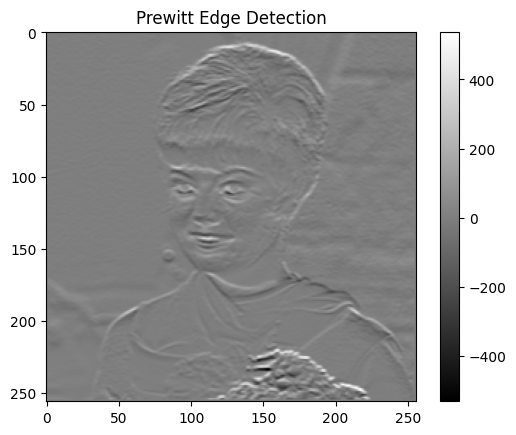

In [ ]:
# Kernel Prewitt untuk deteksi tepi horizontal
prewitt_kernel = [
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
]

# Terapkan Prewitt Edge Detection
prewitt_result = convolution(image_array, prewitt_kernel)
plt.imshow(np.array(prewitt_result), cmap='gray')
plt.title("Prewitt Edge Detection")
plt.colorbar()
plt.show()


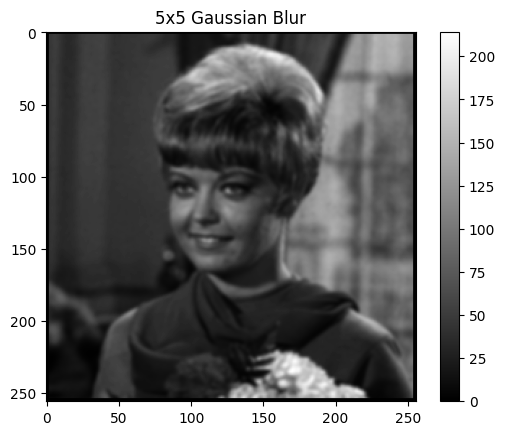

In [ ]:
# Kernel Gaussian Blur 5x5
gaussian_kernel_5x5 = [
    [1/256, 4/256, 6/256, 4/256, 1/256],
    [4/256, 16/256, 24/256, 16/256, 4/256],
    [6/256, 24/256, 36/256, 24/256, 6/256],
    [4/256, 16/256, 24/256, 16/256, 4/256],
    [1/256, 4/256, 6/256, 4/256, 1/256]
]

# Terapkan Gaussian Blur 5x5
gaussian_5x5_result = convolution(image_array, gaussian_kernel_5x5)
plt.imshow(np.array(gaussian_5x5_result), cmap='gray')
plt.title("5x5 Gaussian Blur")
plt.colorbar()
plt.show()


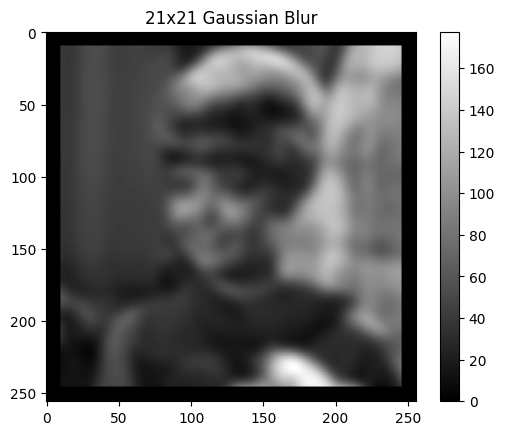

In [ ]:
import cv2
import math

# Generate kernel Gaussian 21x21
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel_21x1 = cv2.getGaussianKernel(kernel_size, sigma)
gaussian_kernel_21x21 = gaussian_kernel_21x1 @ gaussian_kernel_21x1.T

# Terapkan Gaussian Blur 21x21
gaussian_21x21_result = convolution(image_array, gaussian_kernel_21x21)
plt.imshow(np.array(gaussian_21x21_result), cmap='gray')
plt.title("21x21 Gaussian Blur")
plt.colorbar()
plt.show()


### Tugas Kelompok

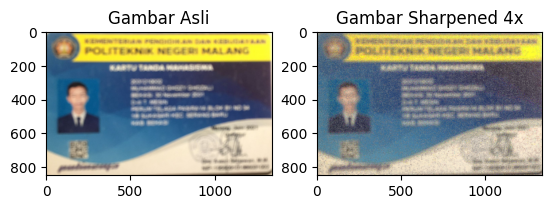

In [ ]:
# Kernel sharpening yang digunakan
sharpening_kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

# Terapkan sharpening sebanyak 4 kali
sharpened_img = img.copy()
for i in range(3):  # Lakukan sharpening 4 kali
    sharpened_img = cv2.filter2D(sharpened_img, -1, sharpening_kernel)

# Tampilkan hasil
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(sharpened_img, cv2.COLOR_BGR2RGB))
plt.title('Gambar Sharpened 4x')

plt.show()


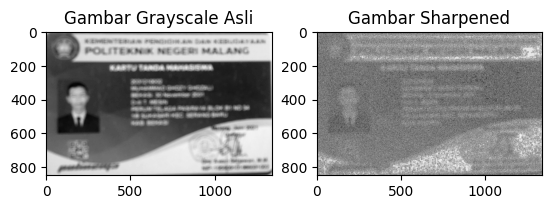

In [ ]:
sharpening_kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sharpened_img = gray_img.copy()
for i in range(4):
    sharpened_img = cv2.filter2D(sharpened_img, -1, sharpening_kernel)

plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Gambar Grayscale Asli')

plt.subplot(1, 2, 2)
plt.imshow(sharpened_img, cmap='gray')
plt.title('Gambar Sharpened')

plt.show()


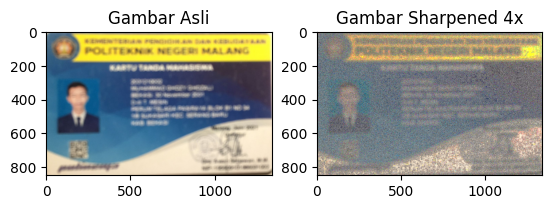

In [ ]:
# Kernel sharpening yang digunakan
sharpening_kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

# Terapkan sharpening sebanyak 4 kali pada gambar 3-channel (RGB)
sharpened_img = img.copy()
for i in range(4):  # Lakukan sharpening 4 kali
    sharpened_img = cv2.filter2D(sharpened_img, -1, sharpening_kernel)

# Tampilkan hasil
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(sharpened_img, cv2.COLOR_BGR2RGB))
plt.title('Gambar Sharpened 4x')

plt.show()


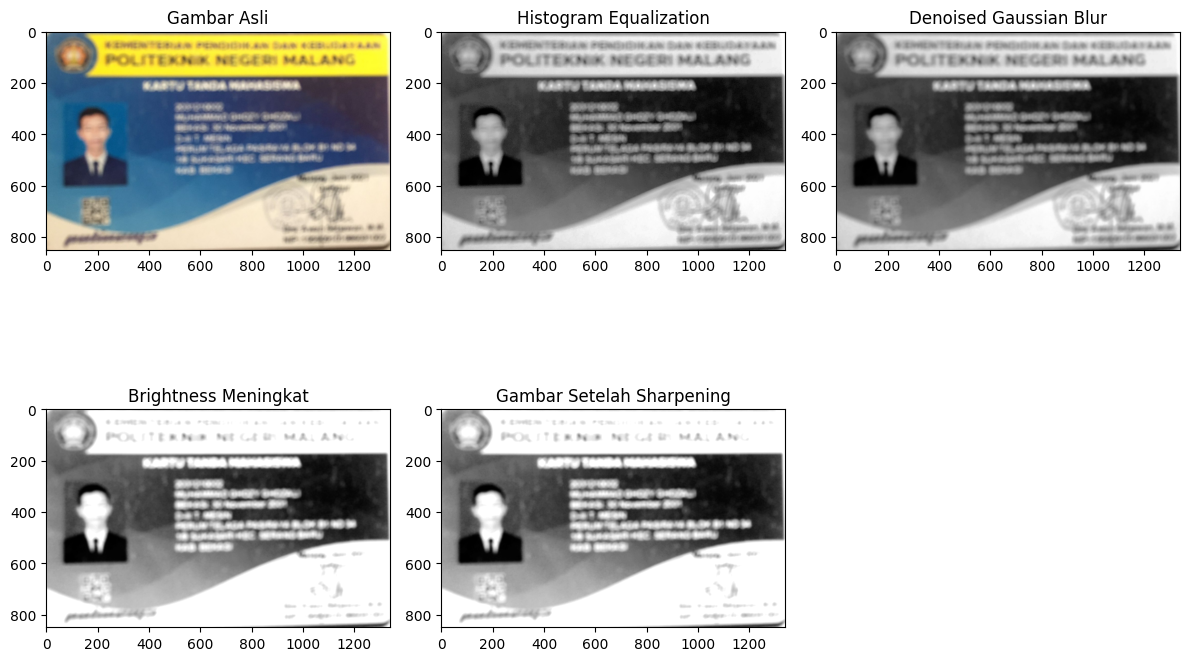

In [ ]:
from PIL import Image, ImageFilter, ImageEnhance
import matplotlib.pyplot as plt
import numpy as np

# Membaca gambar
img = Image.open('/content/drive/MyDrive/Images/KTM.jpg')

# 1. Histogram Equalization
def histogram_equalization(img):
    # Mengubah citra menjadi grayscale
    img_gray = img.convert('L')
    # Menerapkan histogram equalization
    histogram = img_gray.histogram()
    lut = np.zeros(256, dtype=np.uint8)
    total_pixels = sum(histogram)
    cumulative_sum = 0

    for i in range(256):
        cumulative_sum += histogram[i]
        lut[i] = np.clip((cumulative_sum * 255) // total_pixels, 0, 255)

    img_equalized = img_gray.point(lut)
    return img_equalized

equalized_image = histogram_equalization(img)

# 2. Denoised Gaussian Blur
denoised_image = equalized_image.filter(ImageFilter.GaussianBlur(radius=2))

# 3. Operasi Aritmatika untuk Meningkatkan Brightness
brightness_increased_image = ImageEnhance.Brightness(denoised_image).enhance(1.5)  # Meningkatkan brightness 50%

# 4. Sharpening
sharpened_image = brightness_increased_image.filter(ImageFilter.SHARPEN)

# Tampilkan hasil
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Gambar Asli')

plt.subplot(2, 3, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalization')

plt.subplot(2, 3, 3)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Gaussian Blur')

plt.subplot(2, 3, 4)
plt.imshow(brightness_increased_image, cmap='gray')
plt.title('Brightness Meningkat')

plt.subplot(2, 3, 5)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Gambar Setelah Sharpening')

plt.tight_layout()
plt.show()


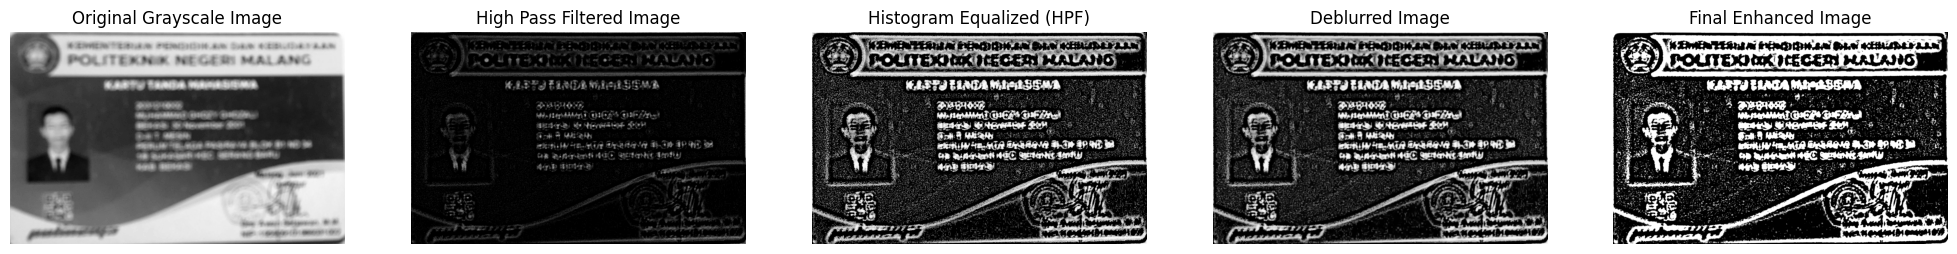

In [ ]:
from PIL import Image, ImageFilter, ImageChops, ImageEnhance
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image (sesuaikan image_path)
image_path = '/content/drive/MyDrive/Images/KTM.jpg'  # Ganti dengan path file Anda
img = Image.open(image_path)

# Convert image to grayscale
gray_img = img.convert('L')

# Function to apply High Pass Filter
def high_pass_filter(image, radius=5.0):
    # Apply Gaussian Blur to the image
    blurred = image.filter(ImageFilter.GaussianBlur(radius))

    # Subtract the blurred image from the original
    high_pass = ImageChops.subtract(image, blurred)

    return high_pass

# Apply High Pass Filter
high_pass_img = high_pass_filter(gray_img, radius=5.0)

# Convert to numpy array for further processing
high_pass_np = np.array(high_pass_img)

# Apply histogram equalization to further enhance contrast
high_pass_eq = cv2.equalizeHist(high_pass_np)

# Apply Gaussian Blur to reduce noise before deblurring
denoised_img = cv2.GaussianBlur(high_pass_eq, (5, 5), 0)

# Deblur the image using fastNlMeansDenoising (reduce noise)
deblurred_img = cv2.fastNlMeansDenoising(denoised_img, None, h=10, templateWindowSize=7, searchWindowSize=21)

# Enhance contrast and brightness
enhancer = ImageEnhance.Contrast(Image.fromarray(deblurred_img))
enhanced_img = enhancer.enhance(2.0)  # Increase contrast

brightness_enhancer = ImageEnhance.Brightness(enhanced_img)
brightened_img = brightness_enhancer.enhance(1.5)  # Increase brightness

# Display the original, high pass, histogram equalized, deblurred, and final enhanced images
fig, ax = plt.subplots(1, 5, figsize=(25, 5))

ax[0].imshow(gray_img, cmap='gray')
ax[0].set_title('Original Grayscale Image')
ax[0].axis('off')

ax[1].imshow(high_pass_np, cmap='gray')
ax[1].set_title('High Pass Filtered Image')
ax[1].axis('off')

ax[2].imshow(high_pass_eq, cmap='gray')
ax[2].set_title('Histogram Equalized (HPF)')
ax[2].axis('off')

ax[3].imshow(deblurred_img, cmap='gray')
ax[3].set_title('Deblurred Image')
ax[3].axis('off')

ax[4].imshow(brightened_img, cmap='gray')
ax[4].set_title('Final Enhanced Image')
ax[4].axis('off')

plt.show()


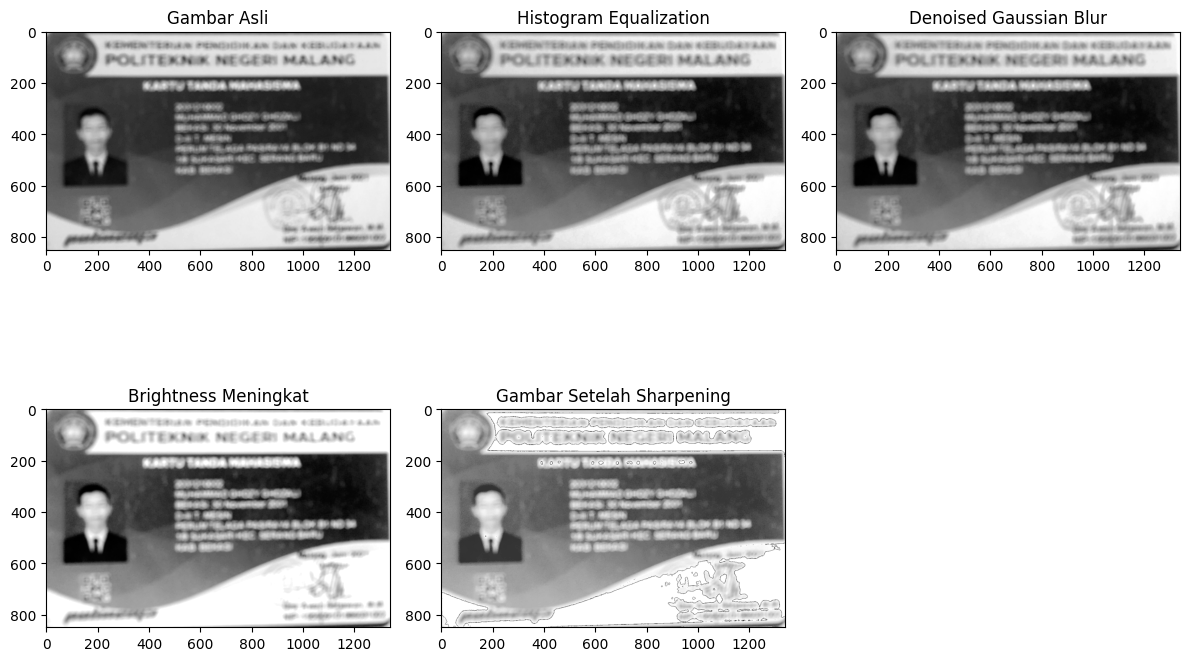

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi konvolusi
def convolution(image, kernel):
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Tentukan padding secara otomatis berdasarkan ukuran kernel
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Tambahkan padding pada gambar asli
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    # Inisialisasi hasil dengan ukuran yang sama
    result = np.zeros_like(image)

    # Melakukan konvolusi
    for i in range(img_height):
        for j in range(img_width):
            # Potong jendela gambar sesuai kernel
            window = padded_image[i:i+kernel_height, j:j+kernel_width]
            # Kalikan dan jumlahkan (dot product)
            result[i, j] = np.sum(window * kernel)

    # Clip hasil agar berada di rentang [0, 255] untuk gambar 8-bit
    result = np.clip(result, 0, 255)

    return result.astype(np.uint8)

# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/Images/KTM.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 1. Histogram Equalization
equalized_image = cv2.equalizeHist(img_gray)

# 2. Denoised Gaussian Blur
denoised_image = cv2.GaussianBlur(equalized_image, (5, 5), 0)

# 3. Operasi Aritmatika untuk Meningkatkan Brightness
# Menambahkan nilai brightness (contoh: +50)
brightness_increased_image = cv2.add(denoised_image, 50)

# 4. Kernel Sharpening
sharpening_kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

# 5. Sharpening
sharpened_image = convolution(brightness_increased_image, sharpening_kernel)

# Tampilkan hasil
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Gambar Asli')

plt.subplot(2, 3, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalization')

plt.subplot(2, 3, 3)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Gaussian Blur')

plt.subplot(2, 3, 4)
plt.imshow(brightness_increased_image, cmap='gray')
plt.title('Brightness Meningkat')

plt.subplot(2, 3, 5)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Gambar Setelah Sharpening')

plt.tight_layout()
plt.show()


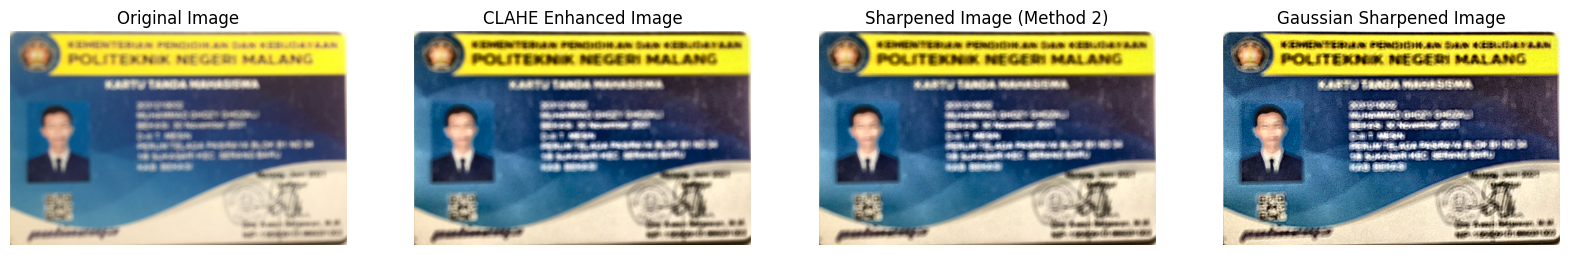

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk CLAHE pada gambar untuk meningkatkan kontras
def clahe_image(image, clipLimit=0.8, tileGridSize=(4, 4)):
    lab = cv.cvtColor(image, cv.COLOR_RGB2LAB)
    l, a, b = cv.split(lab)

    clahe = cv.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize)
    cl = clahe.apply(l)

    limg = cv.merge((cl, a, b))
    enhanced_image = cv.cvtColor(limg, cv.COLOR_LAB2RGB)
    return enhanced_image

# Fungsi untuk menajamkan gambar menggunakan kernel yang berbeda
def sharpen_image(image, method=1):
    if method == 1:
        kernel = np.array([[-2, -1, 0],
                           [-1, 1, 1],
                           [0, 1, 2]])
    else:
        kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
    sharpened_image = cv.filter2D(src=image, ddepth=-1, kernel=kernel)
    return sharpened_image

# Fungsi untuk Gaussian Sharpening menggunakan kernel manual
def gaussian_sharpen(image, kernel_size=21, sigma=5, alpha=1.0):
    # Membuat kernel Gaussian
    kernel = gaussian_kernel(kernel_size, sigma)

    # Melakukan konvolusi untuk setiap channel
    blurred = np.zeros_like(image)
    for c in range(3):  # RGB channels
        blurred[:, :, c] = cv.filter2D(image[:, :, c], -1, kernel)

    # Unsharp Masking
    sharpened = cv.addWeighted(image, 1 + alpha, blurred, -alpha, 0)

    # Menggunakan np.clip untuk memastikan nilai output berada dalam rentang [0, 255]
    sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)

    return sharpened

# Membuat kernel Gaussian
def gaussian_kernel(size, sigma):
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
    return kernel / np.sum(kernel)

# Load image
image_path = '/content/drive/MyDrive/Images/KTM.jpg'  # Ganti dengan path Anda
img = cv.imread(image_path)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# 1. Apply CLAHE (Enhance contrast)
clahe_img = clahe_image(img_rgb, clipLimit=2.0, tileGridSize=(8, 8))

# 2. Apply sharpening (choose method 1 or 2)
sharpened_img = sharpen_image(clahe_img, method=2)

# 3. Apply Gaussian Sharpening
final_sharpened_img = gaussian_sharpen(sharpened_img, kernel_size=21, sigma=5, alpha=1.5)

# Display the images
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

# Original Image
ax[0].imshow(img_rgb)
ax[0].set_title('Original Image')
ax[0].axis('off')

# CLAHE Enhanced Image
ax[1].imshow(clahe_img)
ax[1].set_title('CLAHE Enhanced Image')
ax[1].axis('off')

# Sharpened Image
ax[2].imshow(sharpened_img)
ax[2].set_title('Sharpened Image (Method 2)')
ax[2].axis('off')

# Final Sharpened Image
ax[3].imshow(final_sharpened_img)
ax[3].set_title('Gaussian Sharpened Image')
ax[3].axis('off')

plt.show()


In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk CLAHE pada gambar untuk meningkatkan kontras
def clahe_gambar(gambar, batasKlip=0.8, ukuranGridUbin=(4, 4)):
    lab = cv.cvtColor(gambar, cv.COLOR_RGB2LAB)
    l, a, b = cv.split(lab)

    clahe = cv.createCLAHE(clipLimit=batasKlip, tileGridSize=ukuranGridUbin)
    l_terproses = clahe.apply(l)

    lab_gabung = cv.merge((l_terproses, a, b))
    gambar_enhance = cv.cvtColor(lab_gabung, cv.COLOR_LAB2RGB)
    return gambar_enhance

# Fungsi untuk menajamkan gambar menggunakan kernel yang berbeda
def sharpened_gambar(gambar, metode=1):
    if metode == 1:
        kernel = np.array([[-2, -1, 0],
                           [-1, 1, 1],
                           [0, 1, 2]])
    else:
        kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
    gambar_sharpen = cv.filter2D(src=gambar, ddepth=-1, kernel=kernel)
    return gambar_sharpen

# Fungsi untuk Gaussian Sharpening menggunakan kernel manual
def gaussian_sharpened(gambar, ukuran_kernel=21, sigma=5, alpha=1.0):
    kernel = kernel_gaussian(ukuran_kernel, sigma)

    blur = np.zeros_like(gambar)
    for c in range(3):
        blur[:, :, c] = cv.filter2D(gambar[:, :, c], -1, kernel)

    gambar_sharpen = cv.addWeighted(gambar, 1 + alpha, blur, -alpha, 0)

    # Menggunakan np.clip untuk memastikan nilai output berada dalam rentang [0, 255]
    gambar_sharpen = np.clip(gambar_sharpen, 0, 255).astype(np.uint8)

    return gambar_sharpen

# Membuat kernel Gaussian
def kernel_gaussian(ukuran, sigma):
    sumbu = np.linspace(-(ukuran // 2), ukuran // 2, ukuran)
    xx, yy = np.meshgrid(sumbu, sumbu)
    kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
    return kernel / np.sum(kernel)

# Memuat gambar
path_gambar = '/content/drive/MyDrive/Images/KTM.jpg'  # Ganti dengan path Anda
gambar = cv.imread(path_gambar)
gambar_rgb = cv.cvtColor(gambar, cv.COLOR_BGR2RGB)

# 1. Terapkan CLAHE (Peningkatan kontras)
gambar_clahe = clahe_gambar(gambar_rgb, batasKlip=2.0, ukuranGridUbin=(8, 8))

# 2. Terapkan penajaman (pilih metode 1 atau 2)
gambar_sharpen = sharpened_gambar(gambar_clahe, metode=2)

# 3. Terapkan Gaussian Sharpening
gambar_sharpen_akhir = gaussian_sharpen(gambar_sharpen, ukuran_kernel=21, sigma=5, alpha=1.5)

# Tampilkan gambar
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

# Gambar Asli
ax[0].imshow(gambar_rgb)
ax[0].set_title('Gambar Asli')
ax[0].axis('off')

# Gambar dengan CLAHE
ax[1].imshow(gambar_clahe)
ax[1].set_title('Gambar dengan CLAHE')
ax[1].axis('off')

# Gambar Tajam
ax[2].imshow(gambar_sharpen)
ax[2].set_title('Gambar Tajam (Metode 2)')
ax[2].axis('off')

# Gambar Tajam Akhir (Gaussian Sharpening)
ax[3].imshow(gambar_sharpen_akhir)
ax[3].set_title('Gambar Tajam dengan Gaussian')
ax[3].axis('off')

plt.show()


TypeError: gaussian_sharpen() got an unexpected keyword argument 'ukuran_kernel'